## Lab 4 - Part of speech

 Statement:

  1. Consider Treebank corpus
  
     * Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

     * Evaluate the resulting 24 models using sentences from 3001.
     

  2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

     * Which model would you select? Justify the answer.
     * Upload the jupyter file of the exercise to the Raco.
     

In [1]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag import tnt
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import CRFTagger
from nltk.corpus import treebank
from matplotlib import pyplot as plt

In [2]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /home/moxie/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [5]:
train_data_500 = treebank.tagged_sents()[:500]
train_data_500[10]

[('Neither', 'DT'),
 ('Lorillard', 'NNP'),
 ('nor', 'CC'),
 ('the', 'DT'),
 ('researchers', 'NNS'),
 ('who', 'WP'),
 ('*T*-3', '-NONE-'),
 ('studied', 'VBD'),
 ('the', 'DT'),
 ('workers', 'NNS'),
 ('were', 'VBD'),
 ('aware', 'JJ'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('research', 'NN'),
 ('on', 'IN'),
 ('smokers', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Kent', 'NNP'),
 ('cigarettes', 'NNS'),
 ('.', '.')]

### Training phase of the 24 models

* It might take 4-5 min to train

In [3]:
# Getting the datasets
train_data_500 = treebank.tagged_sents()[:500]
train_data_1000 = treebank.tagged_sents()[:1000]
train_data_1500 = treebank.tagged_sents()[:1500]
train_data_2000 = treebank.tagged_sents()[:2000]
train_data_2500 = treebank.tagged_sents()[:2500]
train_data_3000 = treebank.tagged_sents()[:3000]
#Defining empty list
hmm_list=[]
tnt_list=[]
per_list=[]
crf_list=[]
# Defining traning data list for the loop
train_data = [train_data_500,train_data_1000,train_data_1500,train_data_2000,train_data_2500,train_data_3000]


for i in range(6):
    # HMM training
    trainer = HiddenMarkovModelTrainer()
    hmm = trainer.train_supervised(train_data[i])
    hmm_list.append(hmm)
    #TnT training
    TnT=tnt.TnT()
    TnT.train(train_data[i])
    tnt_list.append(TnT)
    # Perceptron training
    PER = PerceptronTagger(load=False)
    PER.train(train_data[i])
    per_list.append(PER)
    # CRF training
    CRF = CRFTagger()
    CRF.train(train_data[i],'crf_tagger_model')
    crf_list.append(CRF)
#Show data types in each list
print(hmm_list)
print(tnt_list)
print(per_list)
print(crf_list)

[<HiddenMarkovModelTagger 42 states and 3305 output symbols>, <HiddenMarkovModelTagger 44 states and 5391 output symbols>, <HiddenMarkovModelTagger 45 states and 6913 output symbols>, <HiddenMarkovModelTagger 46 states and 8579 output symbols>, <HiddenMarkovModelTagger 46 states and 9786 output symbols>, <HiddenMarkovModelTagger 46 states and 10779 output symbols>]
[<nltk.tag.tnt.TnT object at 0x7f22ebfade80>, <nltk.tag.tnt.TnT object at 0x7f22ebd8f940>, <nltk.tag.tnt.TnT object at 0x7f22eae3ec40>, <nltk.tag.tnt.TnT object at 0x7f22e95d2280>, <nltk.tag.tnt.TnT object at 0x7f22ec2801f0>, <nltk.tag.tnt.TnT object at 0x7f22ec155070>]
[<nltk.tag.perceptron.PerceptronTagger object at 0x7f22ebe15fd0>, <nltk.tag.perceptron.PerceptronTagger object at 0x7f22eb00bfa0>, <nltk.tag.perceptron.PerceptronTagger object at 0x7f22e96057f0>, <nltk.tag.perceptron.PerceptronTagger object at 0x7f22e780c940>, <nltk.tag.perceptron.PerceptronTagger object at 0x7f22e55c4df0>, <nltk.tag.perceptron.PerceptronTagg

### Calculate accuracy
5-6 min to test the 913 data

In [4]:
# Test data from 3001
test_data = treebank.tagged_sents()[3001:]
# list to hold the acurracy of each model
hmm_acurracy_list=[]
TnT_acurracy_list=[]
PER_acurracy_list=[]
CRF_acurracy_list=[]

# Loop to compute acurracy
for i in range(6):
    # HMM acurracy
    hmm=round(hmm_list[i].evaluate(test_data), 3)
    hmm_acurracy_list.append(hmm)
    # TnT acurracy
    Tnt=round(tnt_list[i].evaluate(test_data), 3)
    TnT_acurracy_list.append(Tnt)
    # Perceptron training
    PER=round(per_list[i].evaluate(test_data), 3)
    PER_acurracy_list.append(PER)
    # CRF training
    CRF=round(crf_list[i].evaluate(test_data), 3)
    CRF_acurracy_list.append(CRF)
# Display acurracy of each model
print(len(test_data))
print(hmm_acurracy_list)
print(TnT_acurracy_list)
print(PER_acurracy_list)
print(CRF_acurracy_list)

913
[0.173, 0.221, 0.262, 0.304, 0.335, 0.369]
[0.747, 0.796, 0.828, 0.849, 0.862, 0.876]
[0.914, 0.931, 0.941, 0.948, 0.953, 0.958]
[0.91, 0.925, 0.933, 0.939, 0.943, 0.948]


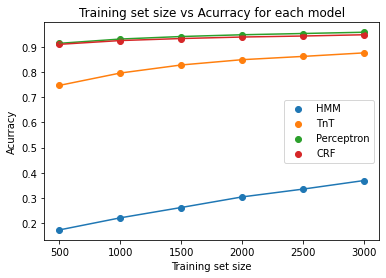

In [5]:
# Visualization of images with amount variation
# Define the sets and titles
training_set_list=[hmm_acurracy_list,
TnT_acurracy_list,
PER_acurracy_list,
CRF_acurracy_list]
training_set_size = [500, 1000, 1500, 2000, 2500 ,3000]
plt_titles=['HMM','TnT', 'Perceptron','CRF']

# Figures subplot
legend=[]
for i in range(4):
    plt.xlabel('Training set size')
    plt.ylabel('Acurracy')
    plot=plt.scatter(training_set_size, training_set_list[i])
    plt.plot(training_set_size, training_set_list[i])
    legend.append(plot)

plt.title("Training set size vs Acurracy for each model")
plt.legend([legend[0], legend[1], legend[2], legend[3]], plt_titles)
plt.show()

### Conclusion

The reason why the size of the set is important, is because it usually has a big effect at the acurracy that we are able to archieve. That is well shown in the figure above. The perceptron and the CRF model are the obvious choice, specially given lower datasets, as both score with a training data of 500 an acurracy above 90%. The TnT might be a good choice as it is certainly a healthier curve in relation with the increasing of the training data size. I can see there's no risk of memorizing the training data and it might generalize better with huge corporal datasets.